In [2]:
# from scripts.als import *

# filename = '../data_store/data/sodankyla_als/lasfiles/tiffs/list5.tiff'
# # filename = '../data/sodankyla_als/lasfiles/tiffs/list30.tiff'

# data = load_raster(filename)

# data = data.where(data <= 100, drop=True)

# center_lat = 67.361833
# center_lon = 26.634154
# width=0.05
# lat_bounds = (center_lat - width, center_lat + width)
# lon_bounds = (center_lon - width / np.cos(np.radians(center_lat)), center_lon + width / np.cos(np.radians(center_lat)))

# def average_pixel_value(data_array, longitude, latitude, w):
#     # Calculate the bounding box
#     lat_min = latitude - w / 2
#     lat_max = latitude + w / 2
#     lon_min = longitude - w / (2 * np.cos(np.radians(latitude)))
#     lon_max = longitude + w / (2 * np.cos(np.radians(latitude)))

#     # data_array.plot(cmap='gray')
#     # Select the data within the bounding box
#     # print(lat_min, lat_max, lon_min, lon_max)
#     sub_data = data_array.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))
#     # print(sub_data)
#     # sub_data.plot(cmap='Greens')

#     # Calculate the average of the valid data
#     average_value = sub_data.mean().item()

#     return average_value

# print(average_pixel_value(data, center_lon, center_lat, 0.005))

# # Plot the data
# plt.figure(figsize=(10, 8))
# plt.pcolormesh(data['lon'], data['lat'], data, cmap='Greens', vmax=100)
# plt.colorbar(label='Raster Value')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Raster Data Plot')
# plt.xlim(lon_bounds)
# plt.ylim(lat_bounds)
# plt.show()

## The above is same as below, but in lat/lon

32.713016510009766


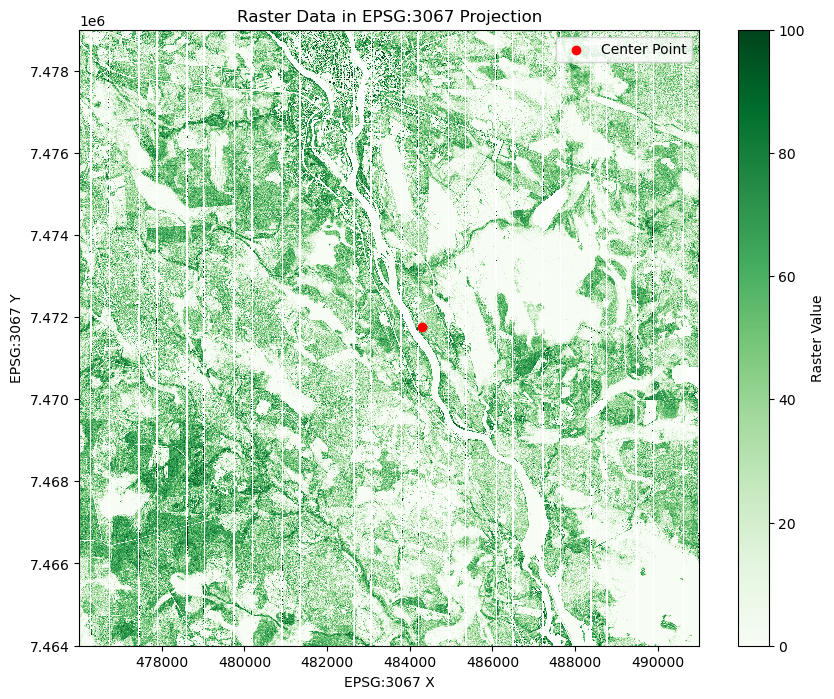

In [1]:
from scripts.als import *

filename = '../data_store/data/sodankyla_als/lasfiles/tiffs/list5.tiff'  # Replace with the path to your actual raster file

# Load the raster in EPSG:3067 projection
data, crs = load_raster(filename)

# Define the center latitude and longitude (replace with your actual values)
center_lat = 67.361833  # Example latitude
center_lon = 26.634154  # Example longitude

x, y = translate(center_lat, center_lon, crs)

# Calculate the average value within the 500m box centered at the point of interest
average_value = average_pixel_value(data, x, y, buffer_size_m=500)
print(average_value)

# Plot the data in its native EPSG:3067 projection
plt.figure(figsize=(10, 8))
plt.pcolormesh(data['x'], data['y'], data, cmap='Greens', vmax=100)
plt.colorbar(label='Raster Value')
plt.xlabel('EPSG:3067 X')
plt.ylabel('EPSG:3067 Y')
plt.title('Raster Data in EPSG:3067 Projection')

# Plot the point of interest (scatter)
plt.scatter(x, y, color='red', label='Center Point', zorder=5)
plt.legend()
plt.show()


In [9]:
from scripts.als import *

filename = '../data_store/data/delta_als/tiffs/cc5.tiff'  # Replace with the path to your actual raster file

# Load the raster in EPSG:3067 projection
data, crs = load_raster(filename)

crs

CRS.from_wkt('LOCAL_CS["unnamed",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

# canopy cover added to pickled df

In [1]:
from scripts.als import *

df = pd.read_pickle('five_sites_data_snow.pkl')
df['cc'] = None

filename = '../data_store/data/sodankyla_als/lasfiles/tiffs/list5.tiff'
data, crs = load_raster(filename)

for index, row in df.iterrows():
    if row['camera'] == 'sodankyla_full':
        x, y = translate(row['latitude'], row['longitude'], crs)
        df.at[index,'cc'] = average_pixel_value(data, center_x = x, center_y = y, buffer_size_m=500)
    else:
        continue

# df = df[df['camera'] == 'sodankyla_full']

In [5]:
# df
# df.to_pickle('five_sites_data_snow_cc.pkl')

# Canopy Cover Accuracy Analysis

In [1]:
from scripts.FSC_dataframe_phoreal import *

# df.to_pickle('five_sites_5km_1kmbox.pkl')
# df_pure.to_pickle('five_sites_pure_5km.pkl')

df=pd.read_pickle('five_sites_data_snow_cc.pkl')
# df=pd.read_pickle('five_sites_5km_thresh5.pkl')
# df_pure=pd.read_pickle('five_sites_pure_10km.pkl')

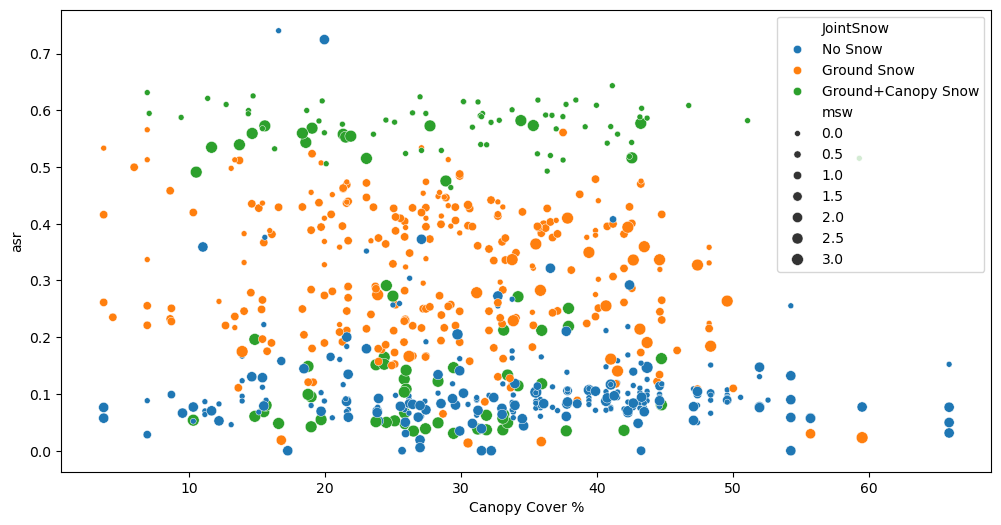

In [25]:
from scripts.hist_plot import *
from scripts.confusion import *

plt.figure(figsize=(12,6))

hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}

loc_df = df[(df['Confidence'] == 1)&(df['cc'] >= 0)].reset_index(drop=True)

scatter = sns.scatterplot(loc_df, x='cc', y='asr', size='msw', hue='JointSnow',palette='tab10',legend='brief')

# Get the handles and labels
handles, labels = scatter.get_legend_handles_labels()

# Separate the handles and labels for hue and size legends
hue_handles = handles[:len(hue_labels) + 1]  # Including the title 'JointSnow'
hue_labels_original = labels[:len(hue_labels) + 1]  # Including the title 'JointSnow'

size_handles = handles[len(hue_labels) + 1:]  # The rest are size labels
size_labels = labels[len(hue_labels) + 1:]  # The rest are size labels

# Replace hue labels with custom labels, ignoring the first label 'JointSnow'
new_hue_labels = [hue_labels[label] if label in hue_labels else label for label in hue_labels_original]

# Combine the new hue labels with the original size labels
new_labels = new_hue_labels + size_labels

# Combine the handles
new_handles = hue_handles + size_handles

scatter.legend(handles=new_handles, labels=new_labels, loc='upper right')
plt.xlabel('Canopy Cover %')
# plt.ylim(-2.5,100)
# plt.xlim(-1,67)
# plt.savefig('./images/canopy_cover/MOD10_vs_canopycover')
plt.show()

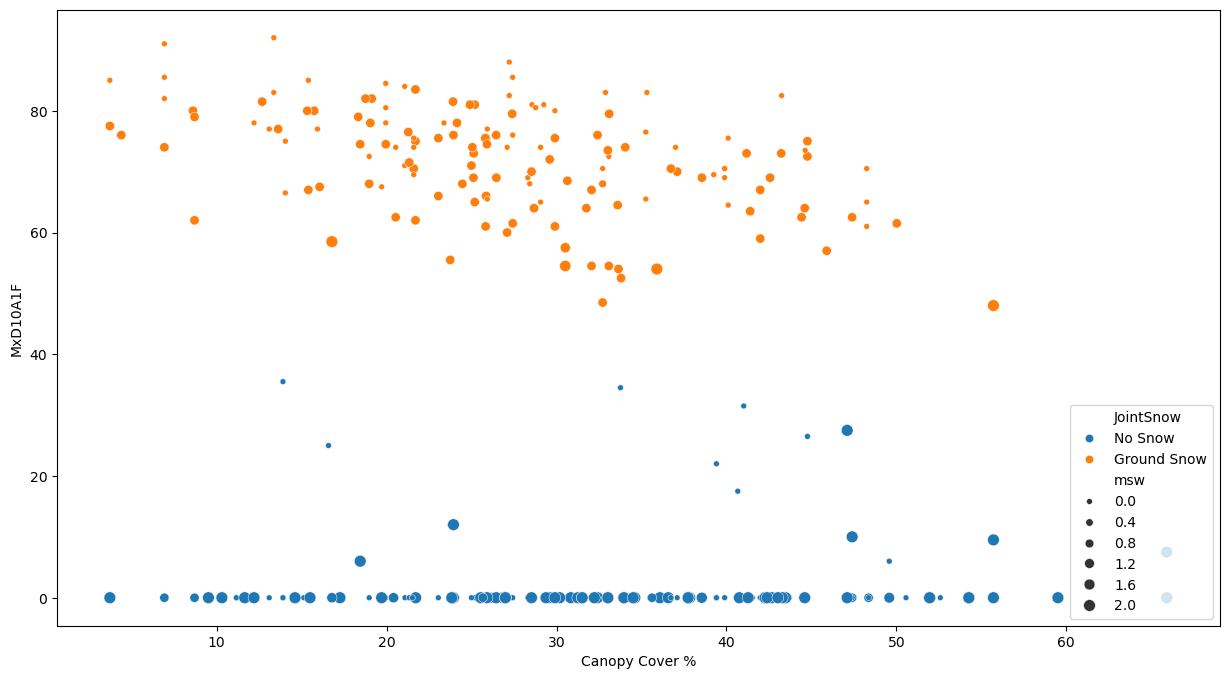

In [26]:
from scripts.hist_plot import *
from scripts.confusion import *

plt.figure(figsize=(15,8))

hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}

loc_df = df[(df['Confidence'] == 1)&(df['cc'] >= 0)&(df['MxD10A1F'] <= 100)&(df['msw'] < 2.1)].reset_index(drop=True)

scatter = sns.scatterplot(loc_df, x='cc', y='MxD10A1F', size='msw', hue='JointSnow',palette='tab10',legend='brief')

# Get the handles and labels
handles, labels = scatter.get_legend_handles_labels()

# Separate the handles and labels for hue and size legends
hue_handles = handles[:len(hue_labels) + 1]  # Including the title 'JointSnow'
hue_labels_original = labels[:len(hue_labels) + 1]  # Including the title 'JointSnow'

size_handles = handles[len(hue_labels) + 1:]  # The rest are size labels
size_labels = labels[len(hue_labels) + 1:]  # The rest are size labels

# Replace hue labels with custom labels, ignoring the first label 'JointSnow'
new_hue_labels = [hue_labels[label] if label in hue_labels else label for label in hue_labels_original]

# Combine the new hue labels with the original size labels
new_labels = new_hue_labels + size_labels

# Combine the handles
new_handles = hue_handles + size_handles

scatter.legend(handles=new_handles, labels=new_labels, loc='lower right')
plt.xlabel('Canopy Cover %')
# plt.ylim(-2.5,100)
# plt.xlim(-1,67)
# plt.savefig('./images/canopy_cover/MOD10_vs_canopycover')
plt.show()

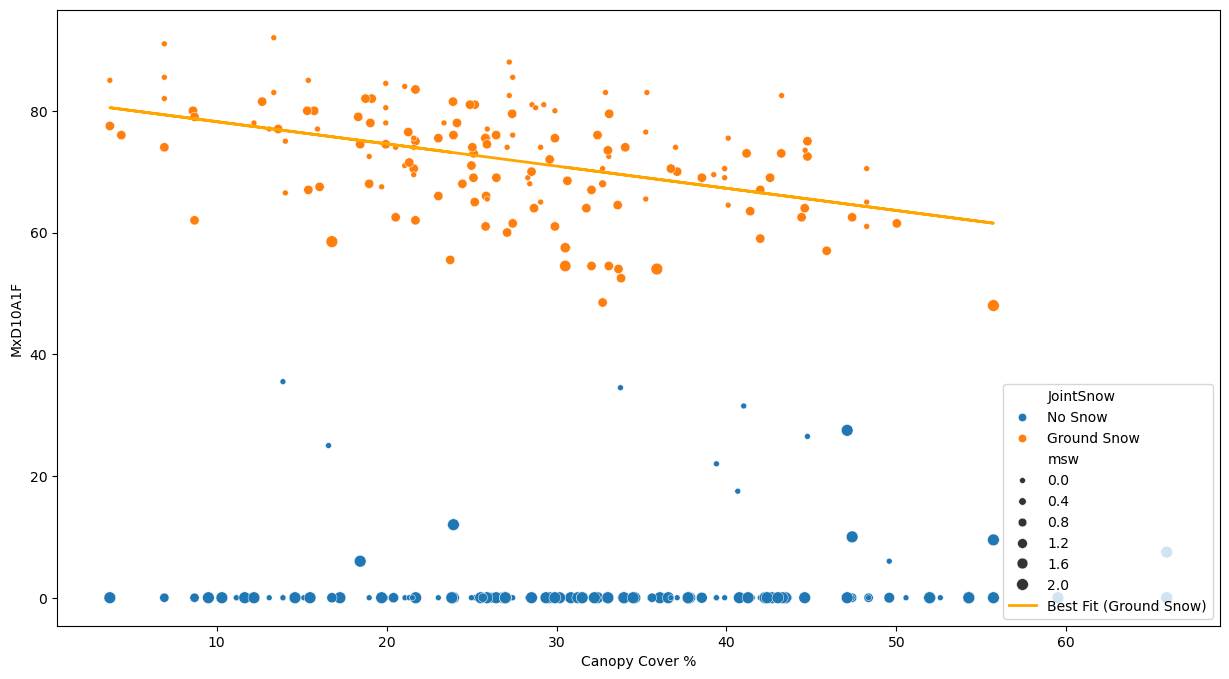

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Filter the data for JointSnow = 1 (Ground Snow)
snow_df = loc_df[loc_df['JointSnow'] == 1]

# Prepare the data for linear regression
X = snow_df['cc'].values.reshape(-1, 1)  # Canopy Cover %
y = snow_df['MxD10A1F'].values  # MxD10A1F

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the y values using the model
y_pred = model.predict(X)

# Plot the original scatter plot
plt.figure(figsize=(15, 8))
scatter = sns.scatterplot(loc_df, x='cc', y='MxD10A1F', size='msw', hue='JointSnow', palette='tab10', legend='brief')

# Plot the line of best fit for the orange data
plt.plot(snow_df['cc'], y_pred, color='orange', linewidth=2, label='Best Fit (Ground Snow)')

# Get the handles and labels
handles, labels = scatter.get_legend_handles_labels()

# Replace hue labels with custom labels
hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}
hue_handles = handles[:len(hue_labels) + 1]
hue_labels_original = labels[:len(hue_labels) + 1]
new_hue_labels = [hue_labels[label] if label in hue_labels else label for label in hue_labels_original]

size_handles = handles[len(hue_labels) + 1:]
size_labels = labels[len(hue_labels) + 1:]
new_labels = new_hue_labels + size_labels
new_handles = hue_handles + size_handles

# Display the legend
scatter.legend(handles=new_handles, labels=new_labels, loc='lower right')

plt.xlabel('Canopy Cover %')
plt.ylabel('MxD10A1F')
plt.show()


Slope: -0.3648257243228883
P-value for slope: 9.7678e-09
The slope is statistically significantly negative.


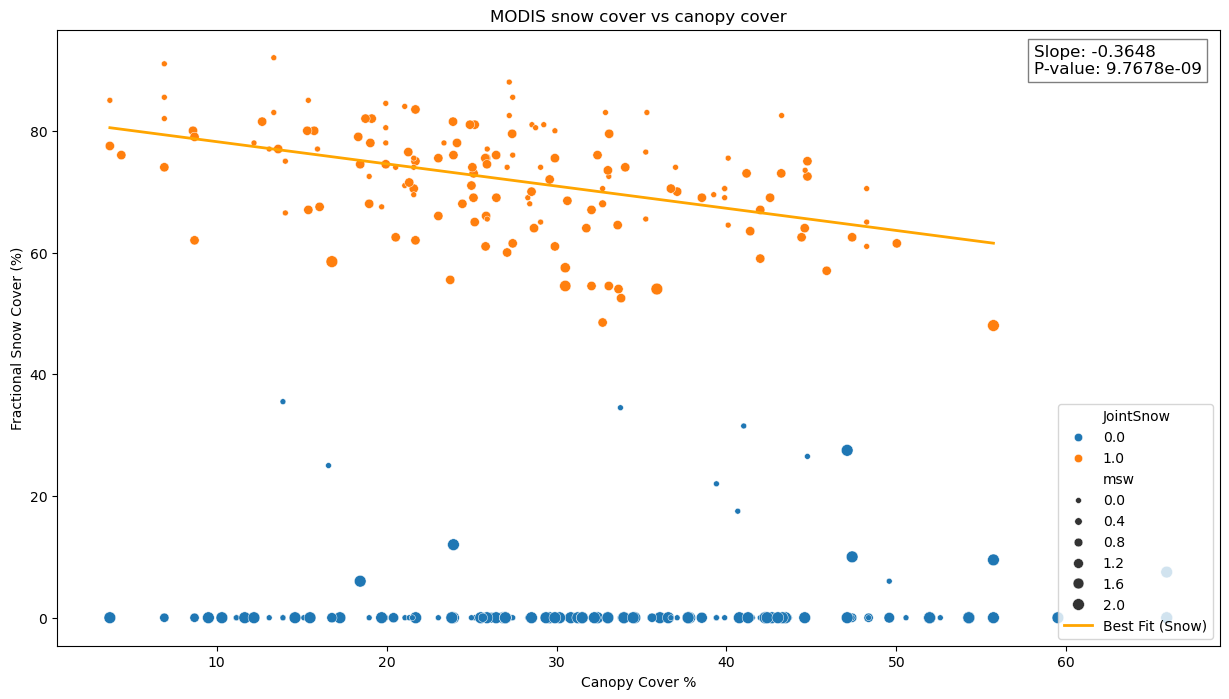

In [63]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for linear regression only for JointSnow = 1
snow_df_filtered = snow_df[snow_df['JointSnow'] == 1]  # Filter for snow data
X = snow_df_filtered['cc'].astype(float).values  # Canopy Cover %
y = snow_df_filtered['MxD10A1F'].astype(float).values  # MxD10A1F

# Check for NaN or infinite values and remove them
mask = np.isfinite(X) & np.isfinite(y)
X = X[mask].reshape(-1, 1)
y = y[mask]

# Add a constant (intercept) to the model
X_with_const = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X_with_const)
results = model.fit()

# Get the slope (coefficient for 'cc') and its p-value
slope = results.params[1]
p_value = results.pvalues[1]

# Print the results
print(f"Slope: {slope}")
print(f"P-value for slope: {p_value:.4e}")  # Print p-value in scientific notation

# Check if the slope is significantly negative
if p_value < 0.05 and slope < 0:
    print("The slope is statistically significantly negative.")
    significance_text = "The slope is statistically significantly negative."
else:
    print("The slope is not statistically significantly negative.")
    significance_text = "The slope is not statistically significantly negative."

# Plotting the data (both JointSnow = 0 and JointSnow = 1)
plt.figure(figsize=(15, 8))
scatter = sns.scatterplot(data=loc_df, x='cc', y='MxD10A1F', size='msw', hue='JointSnow', palette='tab10', legend='brief')

# Plot the line of best fit for the Snow data (JointSnow = 1)
x_vals = np.linspace(X.min(), X.max(), 100)
y_vals = results.predict(sm.add_constant(x_vals.reshape(-1, 1)))
plt.plot(x_vals, y_vals, color='orange', linewidth=2, label='Best Fit (Snow)')

# Update the legend labels
hue_labels = {0.0: 'No Snow', 1.0: 'Snow'}
handles, labels = scatter.get_legend_handles_labels()

new_labels = []
for label in labels:
    if label in hue_labels:
        new_labels.append(hue_labels[float(label)])
    else:
        new_labels.append(label)

plt.legend(handles=handles, labels=new_labels, loc='lower right')

# Customize and show the plot
plt.xlabel('Canopy Cover %')
plt.ylabel('MxD10A1F')

# Add slope and p-value to the plot in scientific notation
plt.text(0.84, 0.95, f"Slope: {slope:.4f}\nP-value: {p_value:.4e}", 
         horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.title('MODIS snow cover vs canopy cover')
plt.ylabel('Fractional Snow Cover (%)')
plt.savefig('./images/canopy_cover_statistically_significant.png')
plt.show()


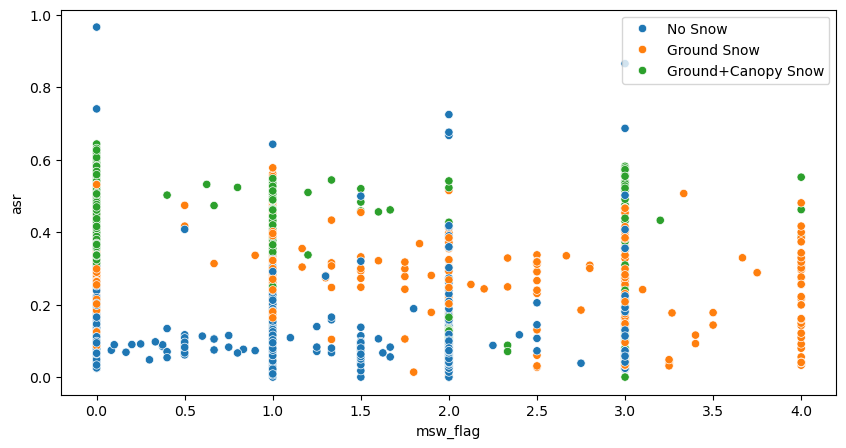

In [18]:
from scripts.hist_plot import *
from scripts.confusion import *

plt.figure(figsize=(10,5))

hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}

loc_df = df[(df['Confidence'] == 1)].reset_index(drop=True)
# loc_df = df[(df['Confidence'] == 1)].reset_index(drop=True)

scatter = sns.scatterplot(data=loc_df, x='msw', y='asr', hue='JointSnow', palette='tab10', legend='brief')

# Get the handles and labels
handles, labels = scatter.get_legend_handles_labels()

# Separate the handles and labels for hue and size legends
hue_handles = handles[:len(hue_labels) + 1]  # Including the title 'JointSnow'
hue_labels_original = labels[:len(hue_labels) + 1]  # Including the title 'JointSnow'

size_handles = handles[len(hue_labels) + 1:]  # The rest are size labels
size_labels = labels[len(hue_labels) + 1:]  # The rest are size labels

# Replace hue labels with custom labels, ignoring the first label 'JointSnow'
new_hue_labels = [hue_labels[label] if label in hue_labels else label for label in hue_labels_original]

# Combine the new hue labels with the original size labels
new_labels = new_hue_labels + size_labels

# Combine the handles
new_handles = hue_handles + size_handles

# Apply the new labels to the legend
scatter.legend(handles=new_handles, labels=new_labels, loc='upper right')

plt.xlabel('msw_flag')
# plt.ylim(-.02,.78)
# plt.xlim(1.9999,2.0001)
# plt.savefig('./images/msw_flag/asr_vs_msw_flag')
plt.show()


# what about including n_photons

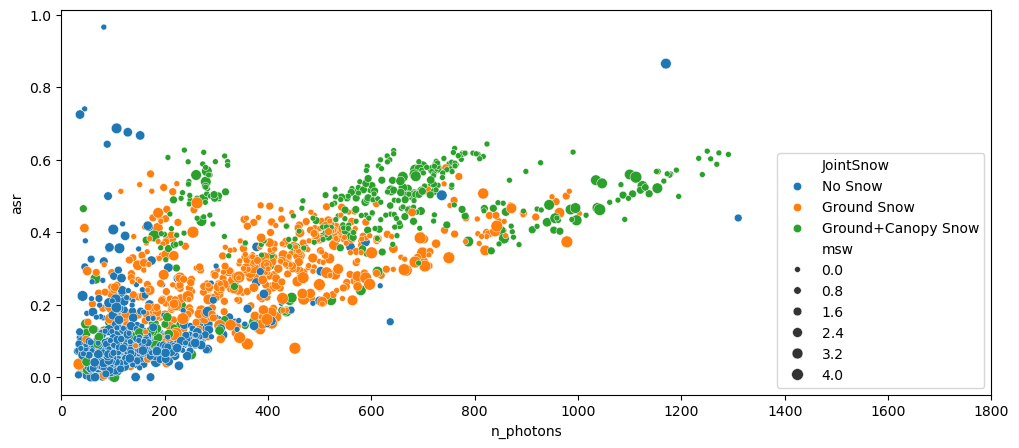

In [21]:
from scripts.hist_plot import *
from scripts.confusion import *

df=pd.read_pickle('five_sites_data_snow_cc.pkl')

plt.figure(figsize=(12,5))

hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}

loc_df = df[(df['Confidence'] == 1)].reset_index(drop=True)
# loc_df = df[(df['Confidence'] == 1)].reset_index(drop=True)

scatter = sns.scatterplot(data=loc_df, x='n_photons', y='asr', size='msw', hue='JointSnow', palette='tab10', legend='brief')

# Get the handles and labels
handles, labels = scatter.get_legend_handles_labels()

# Separate the handles and labels for hue and size legends
hue_handles = handles[:len(hue_labels) + 1]  # Including the title 'JointSnow'
hue_labels_original = labels[:len(hue_labels) + 1]  # Including the title 'JointSnow'

size_handles = handles[len(hue_labels) + 1:]  # The rest are size labels
size_labels = labels[len(hue_labels) + 1:]  # The rest are size labels

# Replace hue labels with custom labels, ignoring the first label 'JointSnow'
new_hue_labels = [hue_labels[label] if label in hue_labels else label for label in hue_labels_original]

# Combine the new hue labels with the original size labels
new_labels = new_hue_labels + size_labels

# Combine the handles
new_handles = hue_handles + size_handles

# Apply the new labels to the legend
scatter.legend(handles=new_handles, labels=new_labels, loc='lower right')

plt.xlabel('n_photons')
# plt.ylim(-.2,1.0)
plt.xlim(0,1800)
# plt.savefig('./images/n_photons/n_photons_vs_asr')
plt.show()


In [22]:
# from scripts.hist_plot import *
# from scripts.confusion import *

# df=pd.read_pickle('five_sites_0-05_0-005box_n_photons_snowreffed.pkl')

# hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}

# # accuracy = []

# for i in np.arange(0,1201,100):
#     # loc_df = df[(df['cc'] < canopy[i+1])&(df['cc'] >= canopy[i])].reset_index(drop=True)
#     print((i,i+100))
#     loc_df = df[(df['Confidence'] == 1)&(df['n_photons'] > i)&(df['n_photons'] <= i+100)].reset_index(drop=True)
#     FI = hist_plot(loc_df, hue_labels, X='asr', Hue='JointSnow', plot=True, preset=False)#, save='/msw_flag/two_classes/asr_w_msw_3-4.png')
#     #     print(FI)
#     # acc = confusion(cc_df, FI, variable='JointSnow',plot=False)
#     # acc
